In [50]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 11.2 MB/s eta 0:00:11
   - -------------------------------------- 4.5/124.9 MB 11.7 MB/s eta 0:00:11
   -- ------------------------------------- 7.1/124.9 MB 11.8 MB/s eta 0:00:10
   --- ------------------------------------ 9.7/124.9 MB 11.8 MB/s eta 0:00:10
   --- ------------------------------------ 12.3/124.9 MB 11.7 MB/s eta 0:00:10
   ---- ----------------------------------- 14.9/124.9 MB 11.7 MB/s eta 0:00:10
   ----- ---------------------------------- 17.3/124.9 MB 11.7 MB/s eta 0:00:10
   ------ --------------------------------- 19.9/124.9 MB 11.8 MB/s eta 0:00:09
   ------- -------------------------------- 22.5/124.9 MB 11.8 MB/s eta 0:00:09
   -------- ------------------------------- 25.2/124.9 MB 11.8 MB/s eta 0:00:09
   -------- ------------------------------- 27.8/124.9 MB 11.8 MB/s eta 0:00:09
   --------- ------------------------------ 30.1/124

# Predicting heart disease using machine learning 

This notebook implemented various ML and data science libraries in an attempt to build an algorithm to predict whether a patient has a heart disease or not based on their medical features.

In achieving that the following 6 steps will be followed:
1. Problem definition
2. Data
3. Evaluation of the model (a treshold or success)
4. Features of the data
5. Modelling
6. Experimentation

## 1. Problem Definition
Problem statement: With the medical attributes of the patients extrapolated, can a prediction be made whether they possess heart disease or not?

This is considered as a classification problem as we have the labels as categories 

## 2. Data

The data was obtained from Kaggle- https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

### Preparing the tools
Importing the data science libraries for data cleaning, manupulation and analysis

In [213]:
#Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib

%matplotlib inline


### Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

### Exploratory Data Analysis (EDA)
Aim: To find out more about the data and become subject expert 

1. What's the problem?
2. What is the kind of data being dealt with and how treat the different types
3. What's missing from the data?
4. Where are the outliers
5. How to add, change or remove features to optimise the model

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#find out the composition of the target column
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

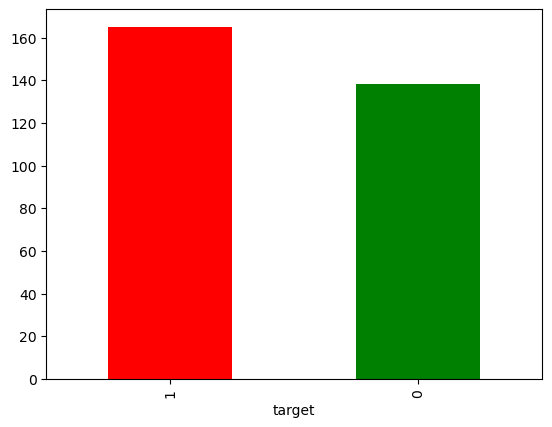

In [6]:
df.target.value_counts().plot(kind='bar', color =['red', 'green'])
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Compare different columns to find patterns 


In [10]:
#Heart Disease frequency according to sex 
df.sex.value_counts()


sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#Compare the target column to sex colum 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


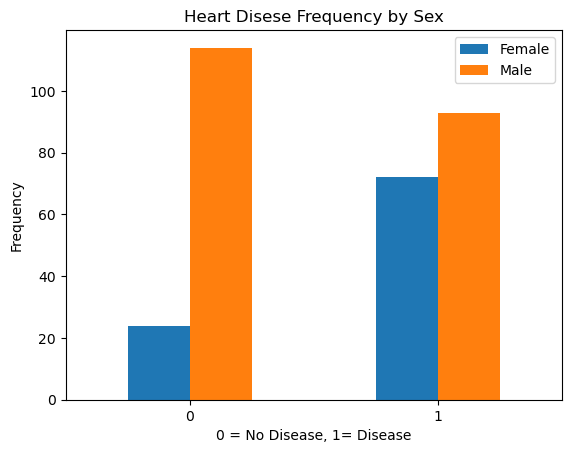

In [12]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar')
plt.title('Heart Disese Frequency by Sex')
plt.xlabel('0 = No Disease, 1= Disease')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)
plt.show()

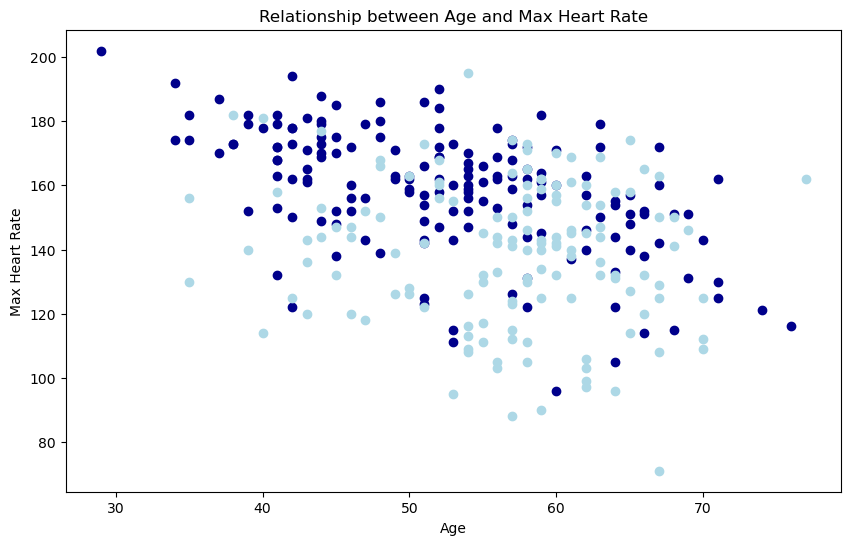

In [13]:
#Age vs max heart rate for heart disease 
plt.figure(figsize= (10,6))
#With Heart Disease
plt.scatter(x=df.age[df.target ==1], y=df.thalach[df.target==1], c='darkblue')
plt.title('Relationship between Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
#Without Heart Disease
plt.scatter(x=df.age[df.target ==0], y=df.thalach[df.target==0], c='lightblue')
plt.show()


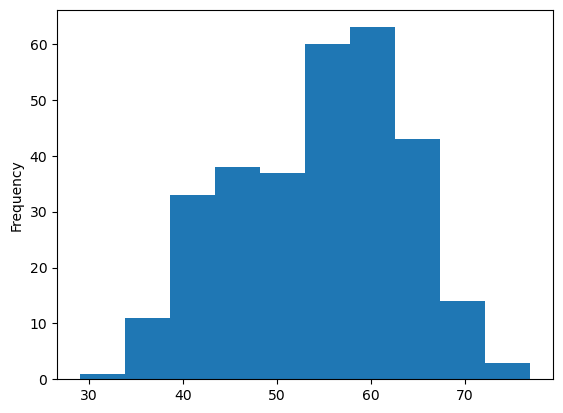

In [14]:
#Distribution of the age
df.age.plot.hist()
plt.show()

In [15]:
#Heart Disease Frequency per Chest pain Type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


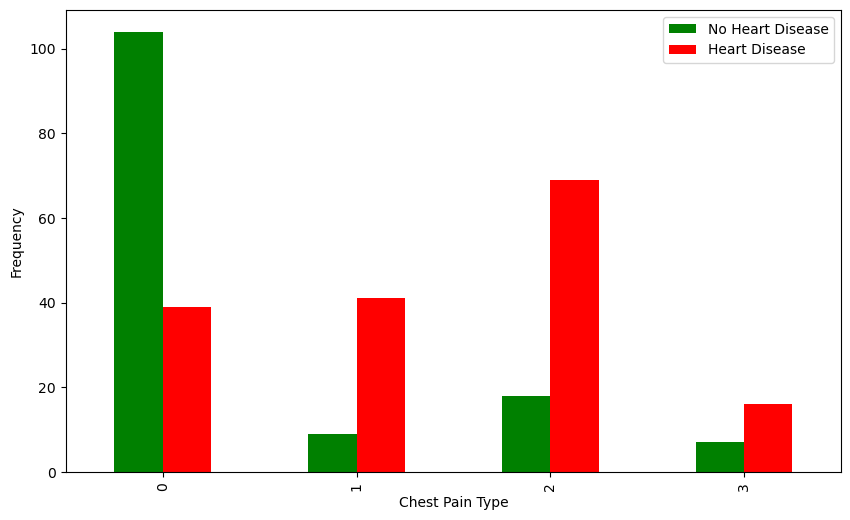

In [16]:
#plot the crosstab
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize = (10,6), color=['green', 'red'])
plt.legend(['No Heart Disease',  'Heart Disease'])
plt.ylabel('Frequency')
plt.xlabel('Chest Pain Type')
plt.show()

In [17]:
#Building a correlation matrix
correlation = df.corr()

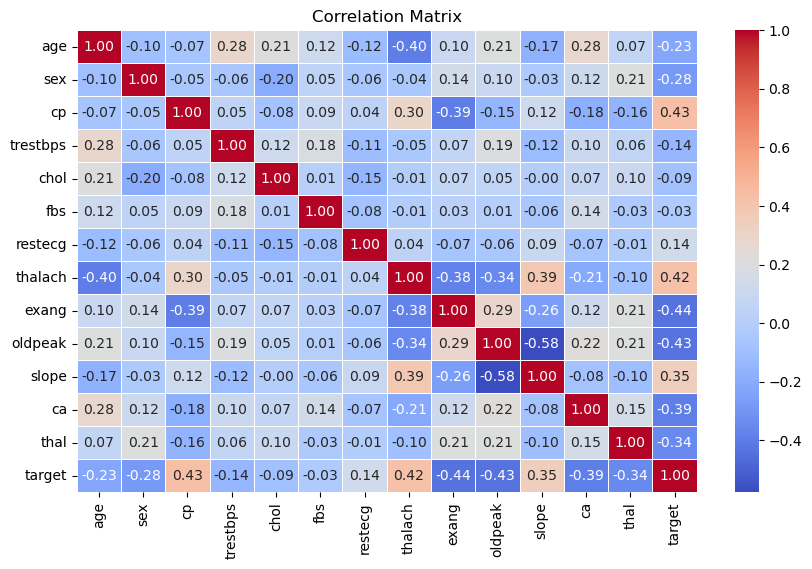

In [18]:
#Plot correlation matrix
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 3. Evalaution
If accuracy is > 95% prediction, the model will be pursued and deployed

## 4. Features
DATA DICTIONARY

1. Age
2. Sex : male : 1
         female : 0
3. chest pain (cp) type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic

4. resting blood pressure (trestbps)

5. serum cholestoral (chol) in mg/dl

6. (fasting blood sugar (fbs) > 120 mg/dl) (1 = true; 0 = false)

7. resting electrocardiographic (rest ecg) results

    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exercise induced angina (exang) (1 = yes; 0 = no)

10. Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

11. oldpeak = ST depression induced by exercise relative to rest

12. slope: the slope of the peak exercise ST segment

    --Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping

13. vessels colored by flourosopy (ca) : number of major vessels (0-3) colored by flourosopy

14. A blood disorder called thalassemia (thal) (3 = normal; 6 = fixed defect; 7 = reversable defect)

15. Target : 0 No Heart disease
             1 Heart disease

## 5. Modelling

In [217]:
#Importing the libraries 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#Split data into X and y
X = df.drop(columns=['target'], axis=1)
y = df.iloc[:,-1:]

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [24]:
#Splitting data into training and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [25]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

Three machine Learning models will be trialled
- Logistic Regression
- K-Nearest Neighbor
- Random Forest Classifier

In [52]:
#Arranging models ina dictionary 
models = {'Logistic Regression': LogisticRegression(), 
          'KNN': KNeighborsClassifier(), 
          'Random Forest': RandomForestClassifier(),
          'XGBoost': XGBClassifier()}
#Create a function to fit and score model 
def fit_and_score(model, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    #Create a empty dictionary to keep the model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit models 
        model.fit(X_train, y_train)
        #Evaluate the models
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [53]:
model_scores=fit_and_score(model = models, 
              X_train=X_train, 
              X_test=X_test, 
              y_train=y_train,
              y_test=y_test)
model_scores

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'XGBoost': 0.819672131147541}

### Model Comparison

In [130]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest,XGBoost
Accuracy,0.885246,0.688525,0.836066,0.819672


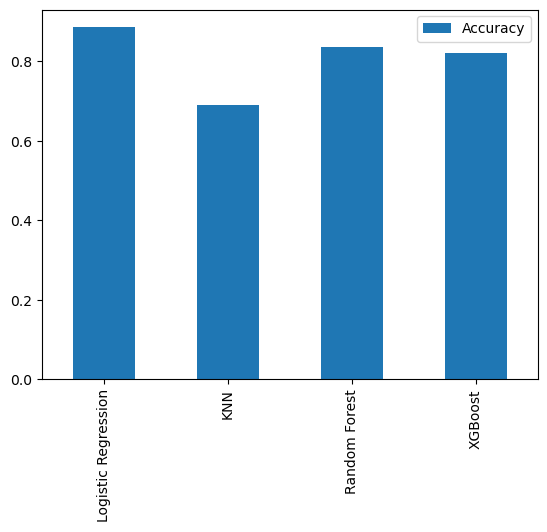

In [131]:
model_compare.T.plot.bar()
plt.show()

### Hyperparameter Tuning (Manual)
- KNN
- XGBoost

In [132]:
#Tunning KNN 
train_scores = []
test_scores = []

#Create a list of values for n_neighbors
neighbors = range(1,21)
knn = KNeighborsClassifier()
#Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the model 
    knn.fit(X_train, y_train)
    #Update the training and testscore list 
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\neighbors\_classification.

In [133]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [134]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

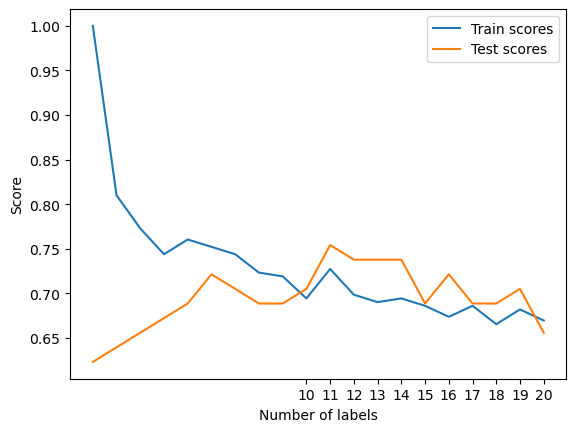

The maximum KNN score on the test data is 75.41%


In [135]:
plt.plot(neighbors, train_scores, label ='Train scores')
plt.plot(neighbors, test_scores, label ='Test scores')
plt.xticks(np.arange(10,21,1))
plt.xlabel('Number of labels')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f'The maximum KNN score on the test data is {max(test_scores)*100:.2f}%')

In [182]:
#Tunning XGBoost 
train_scores = []
test_scores = []

#Create a list of values for n_neighbors
est = range(1,21)
xg = XGBClassifier()
#Loop through different neighbors
for i in est:
    xg.set_params(n_estimators=i)
    #Fit the model 
    xg.fit(X_train, y_train)
    #Update the training and testscore list 
    train_scores.append(xg.score(X_train, y_train))
    test_scores.append(xg.score(X_test, y_test))

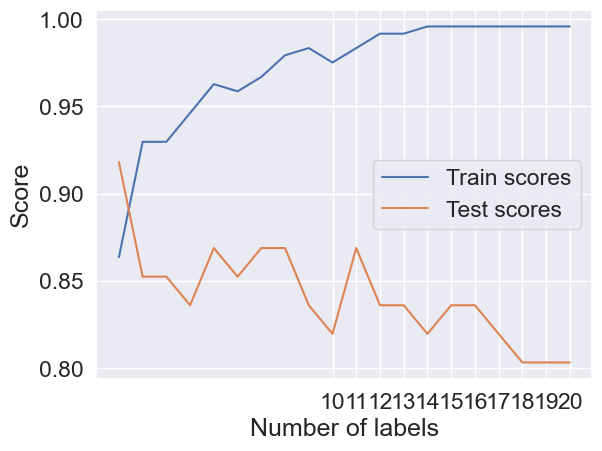

The maximum XGBoost score on the test data is 91.80%


In [183]:
plt.plot(est, train_scores, label ='Train scores')
plt.plot(est, test_scores, label ='Test scores')
plt.xticks(np.arange(10,21,1))
plt.xlabel('Number of labels')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f'The maximum XGBoost score on the test data is {max(test_scores)*100:.2f}%')

### Hyperparameter Tuning (Randomised SearchCV)
- Logistic Regression
- Random Forest Classifier
- XGBoost

In [104]:
#Create a hyperparameter grid for logistic regression
log_reg_grid = {'max_iter': [20,50,100,200,500,1000], 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Create a hyperparameter grid for random forest
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_features': [None, 'sqrt'],
           'min_samples_leaf': np.arange(2,20,2),
           'min_samples_split':  np.arange(1,20,2)}
#Create a hyperparameter grid for XGBoost 
xg_grid = {'n_estimators': [1, 25, 50, 100],
          'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
          'min_child_weight': [1, 2, 3, 4, 5],
          'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [35]:
#Tune logistic regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid, 
                               n_iter=20,
                               verbose=True,cv=5)

#Fit the model 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:133

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'max_iter': [20, 50, 100, 200, 500,
                                                     1000],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=True)

In [36]:
#Checking for the best parameter
rs_log_reg.best_params_

{'solver': 'lbfgs', 'max_iter': 200}

In [37]:
#Evaluating the score
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [38]:
#Tune random forest
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions= rf_grid, 
                               n_iter=20,
                               verbose=True,cv=5)

#Fit the model 
rs_rf.fit(X_train, y_train)

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: Dat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
#Checking for the best parameter
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 9,
 'min_samples_leaf': 14,
 'max_features': 'sqrt'}

In [40]:
#Evaluating th score
rs_rf.score(X_test, y_test)

0.8688524590163934

In [105]:
#Tune XGBoost
np.random.seed(42)
rs_xg = RandomizedSearchCV(XGBClassifier(),
                               param_distributions= xg_grid, 
                               n_iter=20,
                               verbose=True,cv=5)

#Fit the model 
rs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 25, 50, 100],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   verbose=True)

In [106]:
rs_xg.best_params_

{'subsample': 0.5,
 'n_estimators': 50,
 'min_child_weight': 5,
 'max_depth': 9,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.8}

In [107]:
rs_xg.score(X_test, y_test)

0.8524590163934426

### Hyperparameter Tuning (Grid SearchCV)
- Logistic Regression
- Random Forest Classifier

In [108]:
#Create a hyperparameter grid for logistic regression
log_reg_grid = {'max_iter': [20,50,100,200,500,1000], 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Create a hyperparameter grid for random forest
rf_grid = {'n_estimators': [10,20,50,100,200,500,1000],
           'max_features': [None, 'sqrt'],
           'min_samples_leaf': [1,2,4,6,8],
           'min_samples_split': [1,2,4,6,8]}
#Create a hyperparameter grid for XGBoost 
xg_grid = {'n_estimators': [1,5,10,15,20],
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7, 9],
          'colsample_bytree': [0.5,0.8,1.0]}

In [218]:
#Tune logistic regression
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid= log_reg_grid, 
                               verbose=True,cv=5)

#Fit the model 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.3184231300600418. Increase the number of iterations.
  warnings.warn(
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [219]:
gs_log_reg.best_params_

{'max_iter': 200, 'solver': 'lbfgs'}

In [220]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [45]:
#Tune random forest
np.random.seed(42)
gs_rf= GridSearchCV(RandomForestClassifier(),
                               param_grid= rf_grid, 
                               verbose=True,cv=5)

#Fit the model 
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: Dat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [1, 2, 4, 6, 8],
                         'n_estimators': [10, 20, 50, 100, 200, 500, 1000]},
             verbose=True)

In [47]:
gs_rf.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 10}

In [48]:
gs_rf.score(X_test, y_test)

0.819672131147541

In [109]:
#Tune XGBoost
np.random.seed(42)
gs_xg= GridSearchCV(XGBClassifier(),
                    param_grid= xg_grid, 
                    verbose=True,cv=5)

#Fit the model 
gs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [1, 5, 10, 15, 20]},
             verbose=True)

In [110]:
gs_xg.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 20}

In [111]:
gs_xg.score(X_test, y_test)

0.8360655737704918

### Evaluating ML model beyond accuracy 
- ROC and AUC curve
- Confusion Matrix
- Classsification  report
- Precision
- Recall
- f1-score

#### Predictions for the best 3 models

In [153]:
#Make prediction with tuned model (XGBoost)
xg = XGBClassifier(n_estimators=1)
xg.fit(X_train, y_train)
y_preds = xg.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [184]:
#Make prediction with tuned model (Random Forest)
rs_rf =RandomForestClassifier()
rs_rf.fit(X_train, y_train)
y_preds_2 = rs_rf.predict(X_test)
y_preds_2

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [185]:
#Make prediction with tuned model (Logistic Regression)
gs_log_reg =LogisticRegression()
gs_log_reg.fit(X_train, y_train)
y_preds_3 = gs_log_reg.predict(X_test)
y_preds_3

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#### ROC curve and AUC metric for the models

In [187]:
#Plot ROC curve and calculate AUC metric - XGBoost
fpr, tpr, thresholds= roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)

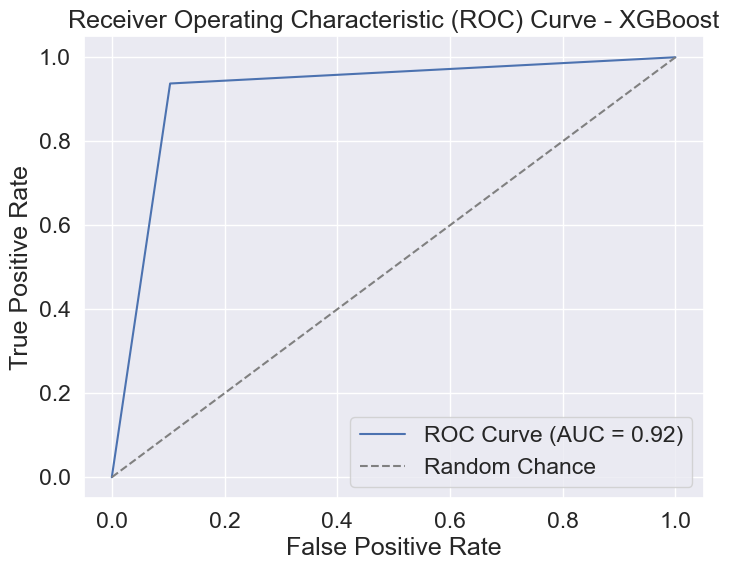

In [188]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [191]:
#Plot ROC curve and calculate AUC metric - RF
fpr2, tpr2, thresholds2= roc_curve(y_test, y_preds_2)
auc2 = roc_auc_score(y_test, y_preds_2)

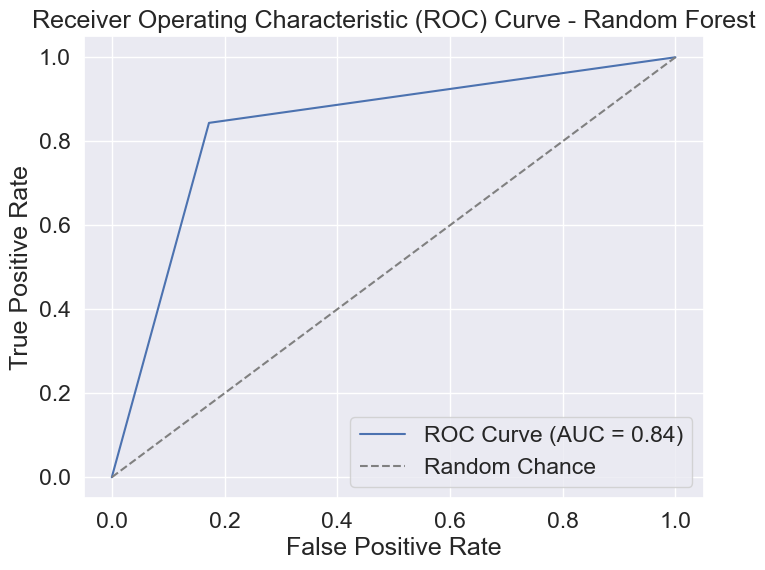

In [192]:
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label=f'ROC Curve (AUC = {auc2:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [193]:
#Plot ROC curve and calculate AUC metric - Logistic Regression
fpr3, tpr3, thresholds3= roc_curve(y_test, y_preds_3)
auc3 = roc_auc_score(y_test, y_preds_3)

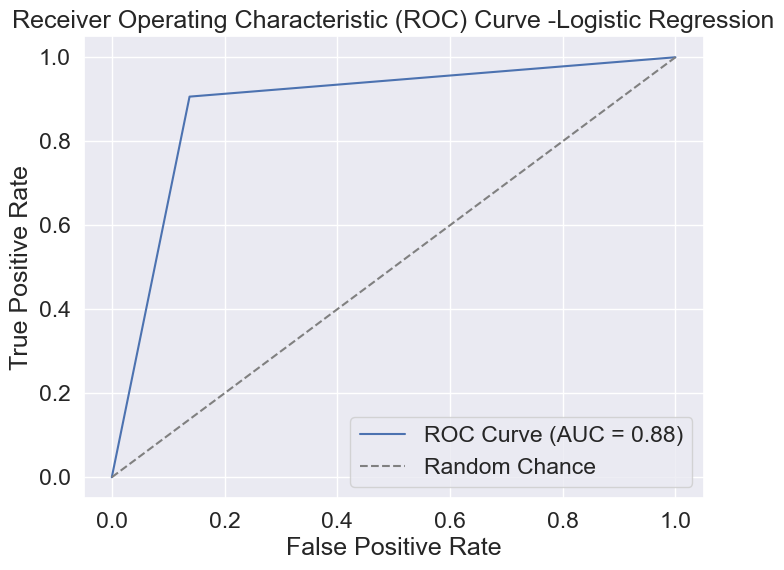

In [194]:
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, label=f'ROC Curve (AUC = {auc3:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.title('Receiver Operating Characteristic (ROC) Curve -Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Confusion Matrix

In [196]:
#Confusion matrix 
print(confusion_matrix(y_test, y_preds_2))

[[24  5]
 [ 5 27]]


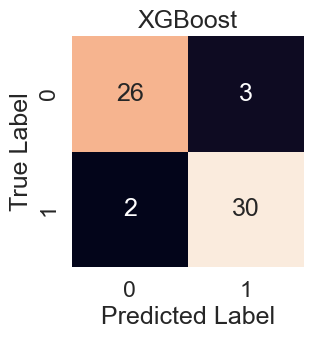

In [195]:
#Visualise matrix with seaborn - XGBoost
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax =sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True, 
                   cbar= False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_conf_mat(y_test, y_preds)

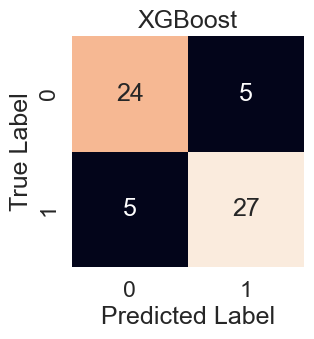

In [200]:
#Visualise matrix with seaborn - Random Forest
plot_conf_mat(y_test, y_preds_2)

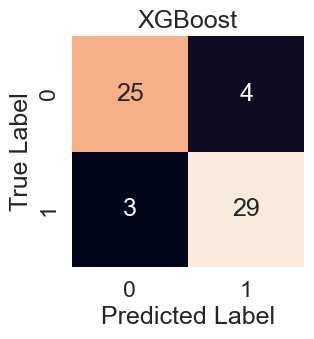

In [201]:
#Visualise matrix with seaborn - Logistic Regression
plot_conf_mat(y_test, y_preds_3)

#### Classification

In [160]:
# Classification - XGBoost
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [202]:
# Classification -Logistic Regression
print(classification_report(y_test, y_preds_3))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Cross Validation

In [209]:
#CV for XGBoost

#Cross-validated accuracy
cv_acc = cross_val_score(xg, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='accuracy')
cv_acc=np.mean(cv_acc)
print(f'Accurcay: {cv_acc}') 

#Cross-validated precision
cv_precision = cross_val_score(xg, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='precision')
cv_precision=np.mean(cv_precision)
print(f'Precision: {cv_precision}')

#Cross-validated recall
cv_recall = cross_val_score(xg, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='recall')
cv_recall=np.mean(cv_recall)
print(f'Recall: {cv_recall}')

#Cross-validated f1
cv_f1= cross_val_score(xg, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='f1')
cv_f1=np.mean(cv_f1)
print(f'f1 score: {cv_f1}')

Accurcay: 0.7952459016393443
Precision: 0.7913997113997115
Recall: 0.8545454545454545
f1 score: 0.8201798031465553


In [221]:
gs_log_reg.best_params_

{'max_iter': 200, 'solver': 'lbfgs'}

In [223]:
clf = LogisticRegression(max_iter=200, solver='lbfgs')
clf.fit(X_train, y_train)

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [227]:
#CV for Logistic Regression

#Cross-validated accuracy
cv_acc1 = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='accuracy')
cv_acc1=np.mean(cv_acc1)


#Cross-validated precision
cv_precision1 = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='precision')
cv_precision1=np.mean(cv_precision1)


#Cross-validated recall
cv_recall1 = cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='recall')
cv_recall1=np.mean(cv_recall1)


#Cross-validated f1
cv_f1_1= cross_val_score(clf, 
                         X, 
                         y, 
                         cv=5, 
                         scoring='f1')
cv_f1_1=np.mean(cv_f1_1)

print(f'Accuracy: {cv_acc1}') 
print(f'Precision: {cv_precision1}')
print(f'Recall: {cv_recall1}')
print(f'f1 score: {cv_f1_1}')

C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was pa

Accuracy: 0.8215300546448088
Precision: 0.8198729856314996
Recall: 0.8727272727272727
f1 score: 0.8436044923372522


C:\Users\yusuf\PycharmProjects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


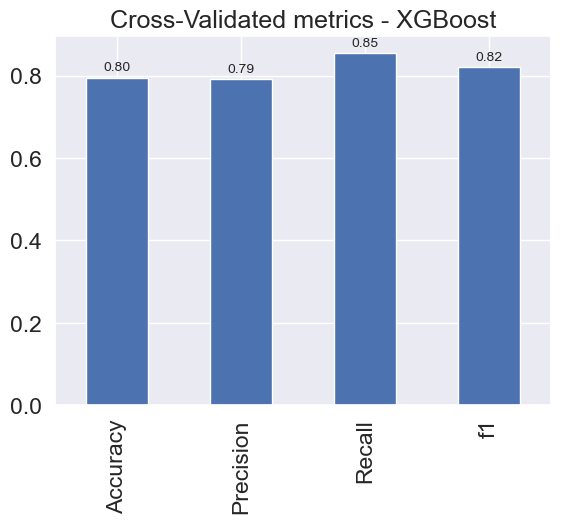

In [230]:
#Visualise cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc, 
                          'Precision':cv_precision,
                          'Recall':cv_recall,
                          'f1':cv_f1}, 
                         index = [0])
ax = cv_metrics.T.plot.bar(title='Cross-Validated metrics - XGBoost',legend=False)
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 0.01,  
        f'{bar.get_height():.2f}',  
        ha='center',  
        va='bottom',  
        fontsize=10   
    )
plt.show()

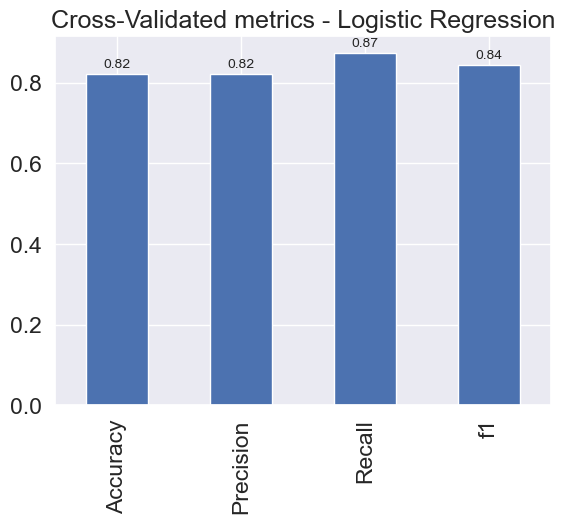

In [229]:
#Visualise cross-validated metrics
cv_metrics_1 = pd.DataFrame({'Accuracy':cv_acc1, 
                          'Precision':cv_precision1,
                          'Recall':cv_recall1,
                          'f1':cv_f1_1}, 
                         index = [0])
ax = cv_metrics_1.T.plot.bar(title='Cross-Validated metrics - Logistic Regression',legend=False)
# Add data labels
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 0.01,  
        f'{bar.get_height():.2f}',  
        ha='center',  
        va='bottom',  
        fontsize=10   
    )

plt.show()

#### Feature Importance

Getting to know which features contributed most to the outcome and to what extent 

In [231]:
#Check coef_ (Logistic Regression)
clf.coef_

array([[ 0.00796088, -1.29330657,  0.82025939, -0.01219986, -0.00209441,
         0.04188846,  0.56032305,  0.02557163, -0.8746845 , -0.61830979,
         0.65107125, -0.7721279 , -0.82659158]])

In [232]:
#Match coefficient of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.007960880768132207,
 'sex': -1.2933065689768355,
 'cp': 0.820259385085579,
 'trestbps': -0.012199864037291288,
 'chol': -0.002094408720016906,
 'fbs': 0.04188845838370631,
 'restecg': 0.5603230471340849,
 'thalach': 0.025571629855346056,
 'exang': -0.874684502206656,
 'oldpeak': -0.6183097921856772,
 'slope': 0.6510712538764449,
 'ca': -0.7721278983172764,
 'thal': -0.8265915799796063}

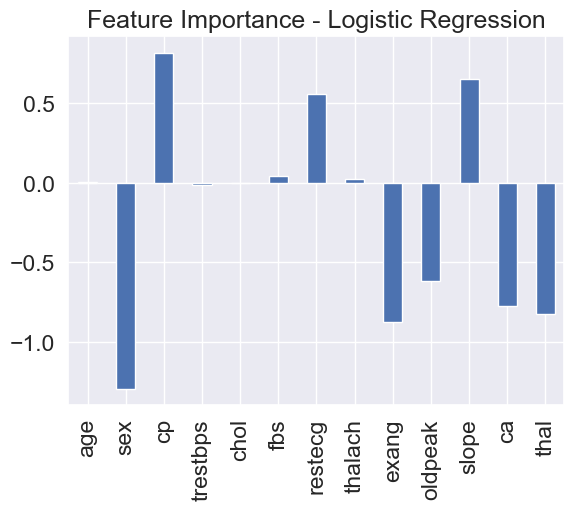

In [253]:
#Visualise feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance - Logistic Regression', legend=False)
plt.show()

In [248]:
#XGBoost feature importance
feature = xg.get_booster().get_score(importance_type="gain")

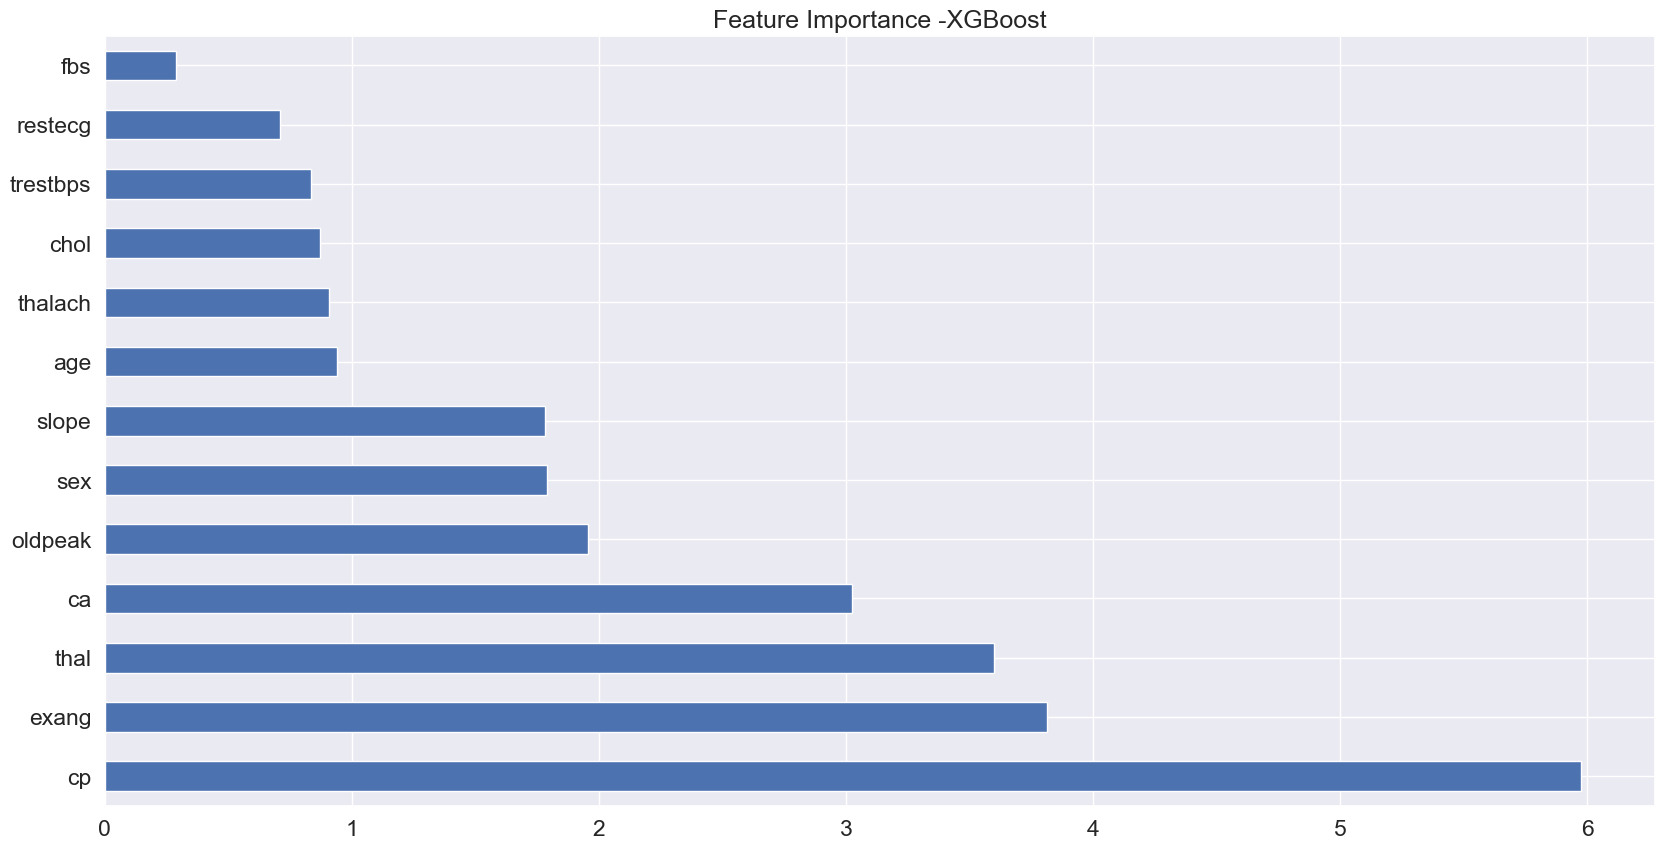

In [254]:
keys = list(feature.keys())
values = list(feature.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10),title='Feature Importance -XGBoost', legend = False)
plt.show()

## 6. Experimention 
Since the target wasnt met, experimentations begins to fulfil the requirements either by collecting more data or try a better model like CatBoost